In [1]:
import pandas as pd
from statsmodels.imputation import mice
import numpy as np
from sklearn.model_selection import cross_val_score

# import submission function
from data_munge import make_country_sub, impute

Input shape:	(8203, 344)
After standardization (8203, 344)
After converting categoricals:	(8203, 859)
Input shape:	(3255, 441)
After standardization (3255, 441)
After converting categoricals:	(3255, 1432)
Input shape:	(6469, 163)
After standardization (6469, 163)
After converting categoricals:	(6469, 795)
Input shape:	(37560, 41)
After standardization (37560, 41)
After converting categoricals:	(37560, 274)
Input shape:	(20252, 224)
After standardization (20252, 224)
After converting categoricals:	(20252, 1641)
Input shape:	(29913, 41)
After standardization (29913, 41)
After converting categoricals:	(29913, 300)
Input shape:	(4041, 344)
After standardization (4041, 344)
After converting categoricals:	(4041, 851)
Input shape:	(1604, 441)
After standardization (1604, 441)
After converting categoricals:	(1604, 1419)
Input shape:	(3187, 163)
After standardization (3187, 163)
After converting categoricals:	(3187, 773)
Input shape:	(18535, 41)
After standardization (18535, 41)
After convertin

In [2]:
# import the raw training data for reference
from data_munge import a_i_train, a_h_train, b_i_train, b_h_train, c_i_train, c_h_train

# import the preprocessed test data
from data_munge import a_i_test, a_h_test, b_i_test, b_h_test, c_i_test, c_h_test

# import the preprocessed data
from data_munge import aX_h_train, ay_h_train, bX_h_train, by_h_train, cX_h_train, cy_h_train
from data_munge import aX_i_train, ay_i_train, bX_i_train, by_i_train, cX_i_train, cy_i_train 

In [7]:
bX_h_train = impute(bX_h_train)
b_h_test_imputed = impute(b_h_test)

In [5]:
from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

In [4]:
model = svm.SVC(probability=True, cache_size=500)
Cs = np.logspace(-6, -1, 10)

clf = GridSearchCV(estimator=model, param_grid=dict(C=Cs),
                   n_jobs=-1, scoring='neg_log_loss')

In [8]:
scores = cross_val_score(model, bX_h_train, by_h_train, scoring='neg_log_loss')

In [9]:
scores

array([-0.23085231, -0.22119605, -0.2258765 ])

In [20]:
model.fit(aX_h_train, ay_h_train)

SVC(C=1.0, cache_size=500, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
benchmark_a.score

array([ 0.30420235,  0.27737576,  0.31650823])

In [10]:
np.mean([benchmark_a.mean_score, benchmark_b.mean_score, benchmark_c.mean_score])

0.25174651498772405

In [42]:
a_preds = model_a.predict_proba(a_h_test)
b_preds = model_b.predict_proba(b_h_test_imputed)
c_preds = model_c.predict_proba(c_h_test)

In [43]:
a_sub = make_country_sub(a_preds, a_h_test, 'A')
b_sub = make_country_sub(b_preds, b_h_test_imputed, 'B')
c_sub = make_country_sub(c_preds, c_h_test, 'C')

In [44]:
submission = pd.concat([a_sub, b_sub, c_sub])

In [45]:
submission.to_csv('submissions/svm_2.csv')

In [22]:
submission_old = pd.read_csv('submissions/imputation_household_2.csv', index_col='id')

In [46]:
submission['type'] = 'SVM'
submission_old['type'] = 'RF'

In [47]:
data = pd.concat([submission,submission_old], axis=0)

In [48]:
import seaborn as sns
%matplotlib inline

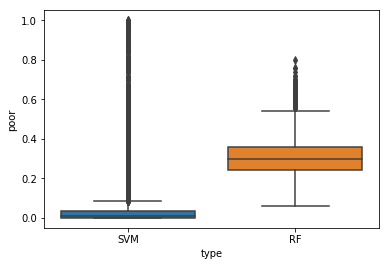

In [49]:
sns.boxplot(x="type", y="poor", data=data)